In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from google.colab import drive

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the root directory of your dataset
dataset_dir = 'dataset/'

# Define the classes
classes = ['mild_dementia', 'moderate_dementia', 'non_dementia', 'very_mild_dementia']

# Define the ratio for splitting (e.g., 80% train, 20% test)
train_ratio = 0.8

# Loop through each class and split the data
for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_dir)

    # Split the images into train and test sets
    train_images, test_images = train_test_split(images, train_size=train_ratio, random_state=42)

    # Create train and test directories if they don't exist
    os.makedirs(os.path.join(dataset_dir, 'train', class_name), exist_ok=True)
    os.makedirs(os.path.join(dataset_dir, 'test', class_name), exist_ok=True)

    # Move the images to their respective directories
    for image in train_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(dataset_dir, 'train', class_name, image)
        shutil.move(src, dst)

    for image in test_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(dataset_dir, 'test', class_name, image)
        shutil.move(src, dst)


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

# Check if GPU is available
if tf.test.gpu_device_name():
    print('GPU found')
    print('GPU device name:', tf.test.gpu_device_name())
else:
    print("No GPU found")


GPU found
GPU device name: /device:GPU:0


In [ ]:
# !pip install kaggle
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set your Kaggle API credentials (replace with your own values)
os.environ['KAGGLE_USERNAME'] = "owaisbashir26"
os.environ['KAGGLE_KEY'] = "2a10d539f059ebaeee13116cbba05211"

# Navigate to your Google Drive
%cd /content/drive/MyDrive/

# # Replace with the actual dataset URL
dataset_url = "https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images"
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

# # Unzip the downloaded file (adjust the filename as needed)
!unzip -q alzheimers-dataset-4-class-of-images.zip


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive
 97% 33.0M/34.1M [00:02<00:00, 22.1MB/s]
100% 34.1M/34.1M [00:02<00:00, 16.7MB/s]


In [ ]:
path='/content/drive/MyDrive/Alzheimer_s Dataset/train'
classes=os.listdir(path)
for i in classes:
  new_path=path+'/'+i
  print(len(os.listdir(new_path)))


717
52
2560
1792


In [ ]:
1279

In [ ]:
import os
dem_types=os.listdir('/content/drive/MyDrive/Dataset')

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [ ]:
root_part='/content/drive/MyDrive/Dataset'
mild_dem=root_part+'/Mild_Demented'
mod_dem=root_part+'/Moderate_Demented'
non_dem=root_part+'/Non_Demented'
very_mild_dem=root_part+'/Very_Mild_Demented'

In [ ]:
Non_Demented_path=root_part+'/Non_Demented'

In [ ]:
Non_Demented_files=os.listdir(root_part+'/Non_Demented')
Demented_files=os.listdir(root_part+'/Mild_Demented')+os.listdir(root_part+'/Moderate_Demented')+os.listdir(root_part+'/Very_Mild_Demented')

In [ ]:
len(Demented_files)

3200

In [ ]:
categories=[mild_dem,mod_dem,non_dem,very_mild_dem]
categories

['/content/drive/MyDrive/Dataset/Mild_Demented',
 '/content/drive/MyDrive/Dataset/Moderate_Demented',
 '/content/drive/MyDrive/Dataset/Non_Demented',
 '/content/drive/MyDrive/Dataset/Very_Mild_Demented']

In [ ]:
total_images=0
for i in categories:
  total_images+=len(os.listdir(i))
  print(str(i),len(os.listdir(i)))



/content/drive/MyDrive/Dataset/Mild_Demented 896
/content/drive/MyDrive/Dataset/Moderate_Demented 64
/content/drive/MyDrive/Dataset/Non_Demented 3200
/content/drive/MyDrive/Dataset/Very_Mild_Demented 2240


In [ ]:
np.set_printoptions(edgeitems=100, linewidth=120)

In [ ]:
import numpy as np
from sklearn.utils import resample

# Load and prepare your data
non_demented_data = np.load('/content/drive/MyDrive/non_demented_images_arrays.npy')
very_mild_demented_data = np.load('/content/drive/MyDrive/very_mild_demented_images_arrays.npy')

# Calculate the difference in sample counts
sample_difference = len(very_mild_demented_data) - len(non_demented_data)

# Undersample the majority class (Non Demented)
undersampled_non_demented_data = resample(non_demented_data, n_samples=len(very_mild_demented_data), random_state=42)

# Now you have balanced data for both classes
balanced_data = np.concatenate((undersampled_non_demented_data, very_mild_demented_data), axis=0)


In [ ]:
balanced_data[0]

array([[-0.87392018, -0.87392018, -0.87392018, ..., -0.87392018,
        -0.87392018, -0.87392018],
       [-0.87392018, -0.87392018, -0.87392018, ..., -0.87392018,
        -0.87392018, -0.87392018],
       [-0.87392018, -0.87392018, -0.87392018, ..., -0.87392018,
        -0.87392018, -0.87392018],
       ...,
       [-0.87392018, -0.87392018, -0.87392018, ..., -0.87392018,
        -0.87392018, -0.87392018],
       [-0.87392018, -0.87392018, -0.87392018, ..., -0.87392018,
        -0.87392018, -0.87392018],
       [-0.87392018, -0.87392018, -0.87392018, ..., -0.87392018,
        -0.87392018, -0.87392018]])

In [ ]:
balanced_data.shape

(4480, 128, 128)

In [ ]:
very_mild_demented_images_arrays=np.array(very_mild_demented_images_arrays).shape

In [ ]:
import numpy as np

In [ ]:
demented_images_arrays = np.load('/content/drive/My Drive/demented_images_arrays.npy')
non_demented_images_arrays = np.load('/content/drive/My Drive/non_demented_images_arrays.npy')

In [ ]:
total_images_arrays=np.concatenate((non_demented_images_arrays,demented_images_arrays),axis=0)

In [ ]:
total_images_arrays.shape

(6400, 128, 128)

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(total_images_arrays_rgb, labels, test_size=0.2, random_state=42)

In [ ]:
total_images_arrays[0]

array([[-0.76972838, -0.76972838, -0.76972838, ..., -0.76972838,
        -0.76972838, -0.76972838],
       [-0.76972838, -0.76972838, -0.76972838, ..., -0.76972838,
        -0.76972838, -0.76972838],
       [-0.76972838, -0.76972838, -0.76972838, ..., -0.76972838,
        -0.76972838, -0.76972838],
       ...,
       [-0.76972838, -0.76972838, -0.76972838, ..., -0.76972838,
        -0.76972838, -0.76972838],
       [-0.76972838, -0.76972838, -0.76972838, ..., -0.76972838,
        -0.76972838, -0.76972838],
       [-0.76972838, -0.76972838, -0.76972838, ..., -0.76972838,
        -0.76972838, -0.76972838]])

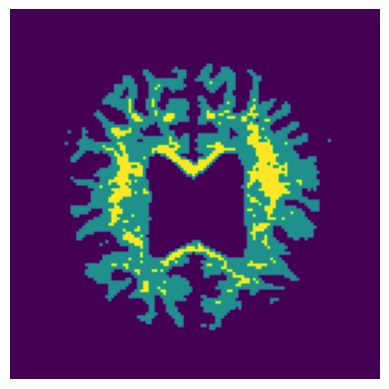

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Assuming 'gray_image_array' is your grayscale image represented as a NumPy array
# 'gray_image_array' should have a shape like (height, width)

# Convert the grayscale array to a PIL Image
gray_image = Image.fromarray(np.uint8(total_images_arrays[0]))

# Convert the grayscale image to RGB format


# Display the RGB image
plt.imshow(gray_image)
plt.axis('off')  # Optional: Remove axis
plt.show()


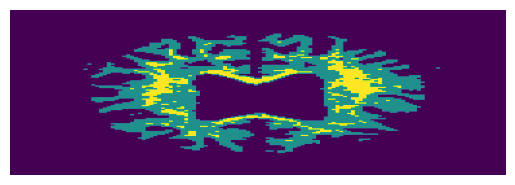

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Assuming 'gray_image_array' is your grayscale image represented as a NumPy array
# 'gray_image_array' should have a shape like (height, width)

# Convert the grayscale array to a PIL Image
gray_image = Image.fromarray(np.uint8(total_images_arrays[0]))

# Convert the grayscale image to RGB format using np.repeat
rgb_image = np.repeat(gray_image, 3, axis=-1)

# Display the RGB image
plt.imshow(rgb_image)
plt.axis('off')  # Optional: Remove axis
plt.show()


In [ ]:
predictions

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_6')>

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,batch_size=32)


Epoch 1/10
160/160 [==============================] - 10s 30ms/step - loss: 1.4415 - accuracy: 0.5049 - val_loss: 0.6935 - val_accuracy: 0.4789
Epoch 2/10
160/160 [==============================] - 4s 26ms/step - loss: 0.7033 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.4789
Epoch 3/10
160/160 [==============================] - 4s 26ms/step - loss: 0.6972 - accuracy: 0.5066 - val_loss: 0.6931 - val_accuracy: 0.5211
Epoch 4/10
160/160 [==============================] - 4s 25ms/step - loss: 0.6951 - accuracy: 0.5082 - val_loss: 0.6929 - val_accuracy: 0.5211
Epoch 5/10
160/160 [==============================] - 4s 25ms/step - loss: 0.6950 - accuracy: 0.4988 - val_loss: 0.6930 - val_accuracy: 0.5211
Epoch 6/10
160/160 [==============================] - 4s 26ms/step - loss: 0.6942 - accuracy: 0.4955 - val_loss: 0.6936 - val_accuracy: 0.4789
Epoch 7/10
160/160 [==============================] - 4s 26ms/step - loss: 0.6946 - accuracy: 0.5033 - val_loss: 0.6939 - val_accuracy: 0.478

In [ ]:
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 dense_13 (Dense)            (None, 128)              

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score
predictions = model.predict(X_test)

# Apply threshold to get binary predictions
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, binary_predictions)

# Calculate precision
precision = precision_score(y_test, binary_predictions)

# Calculate recall
recall = recall_score(y_test, binary_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

28/28 [==============================] - 0s 4ms/step
Accuracy: 0.9754464285714286
Precision: 0.9907407407407407
Recall: 0.9596412556053812


In [ ]:
# Save the entire model (architecture, weights, optimizer state)
model.save('/content/drive/MyDrive/my_model.h5')


In [ ]:
y_pred=model.predict(X_test)

28/28 [==============================] - 0s 4ms/step


In [ ]:
y_pred